In [49]:
from IPython import get_ipython
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sm1
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor



In [50]:
#(b) Exploring the data:
#i. How many rows are in this data set? How many columns? What do the rows
#and columns represent?
#ii. Make pairwise scatterplots of all the varianbles in the data set including the
#predictors (independent variables) with the dependent variable. Describe
#your findings.
#iii. What are the mean, the median, range, first and third quartiles, and in-
#terquartile ranges of each of the variables in the dataset? Summarize them
#in a table.

# i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [51]:
dataset = pd.read_csv('data2.csv')
row_coloumn_number = dataset.count()

count = 0
for no1,no2 in row_coloumn_number.items():
    count=count+1
print("Number of coloumns "+ str(count))
print("Number of rows "+ str(no2))
print("The rows represent Values and coloumns represent different festures ")

Number of coloumns 5
Number of rows 9568
The rows represent Values and coloumns represent different festures 


# ambient variables Temperature (AT),
# Ambient Pressure (AP), 
# Relative Humidity (RH) 
# Exhaust Vacuum (V) 
# electrical energy output (EP)


In [52]:
# converting it into dependent and independent data
independent = dataset.iloc[:,:-1]
dependent =dataset.iloc[:,4:]



# ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

Text(0,0.5,'Energy Output')

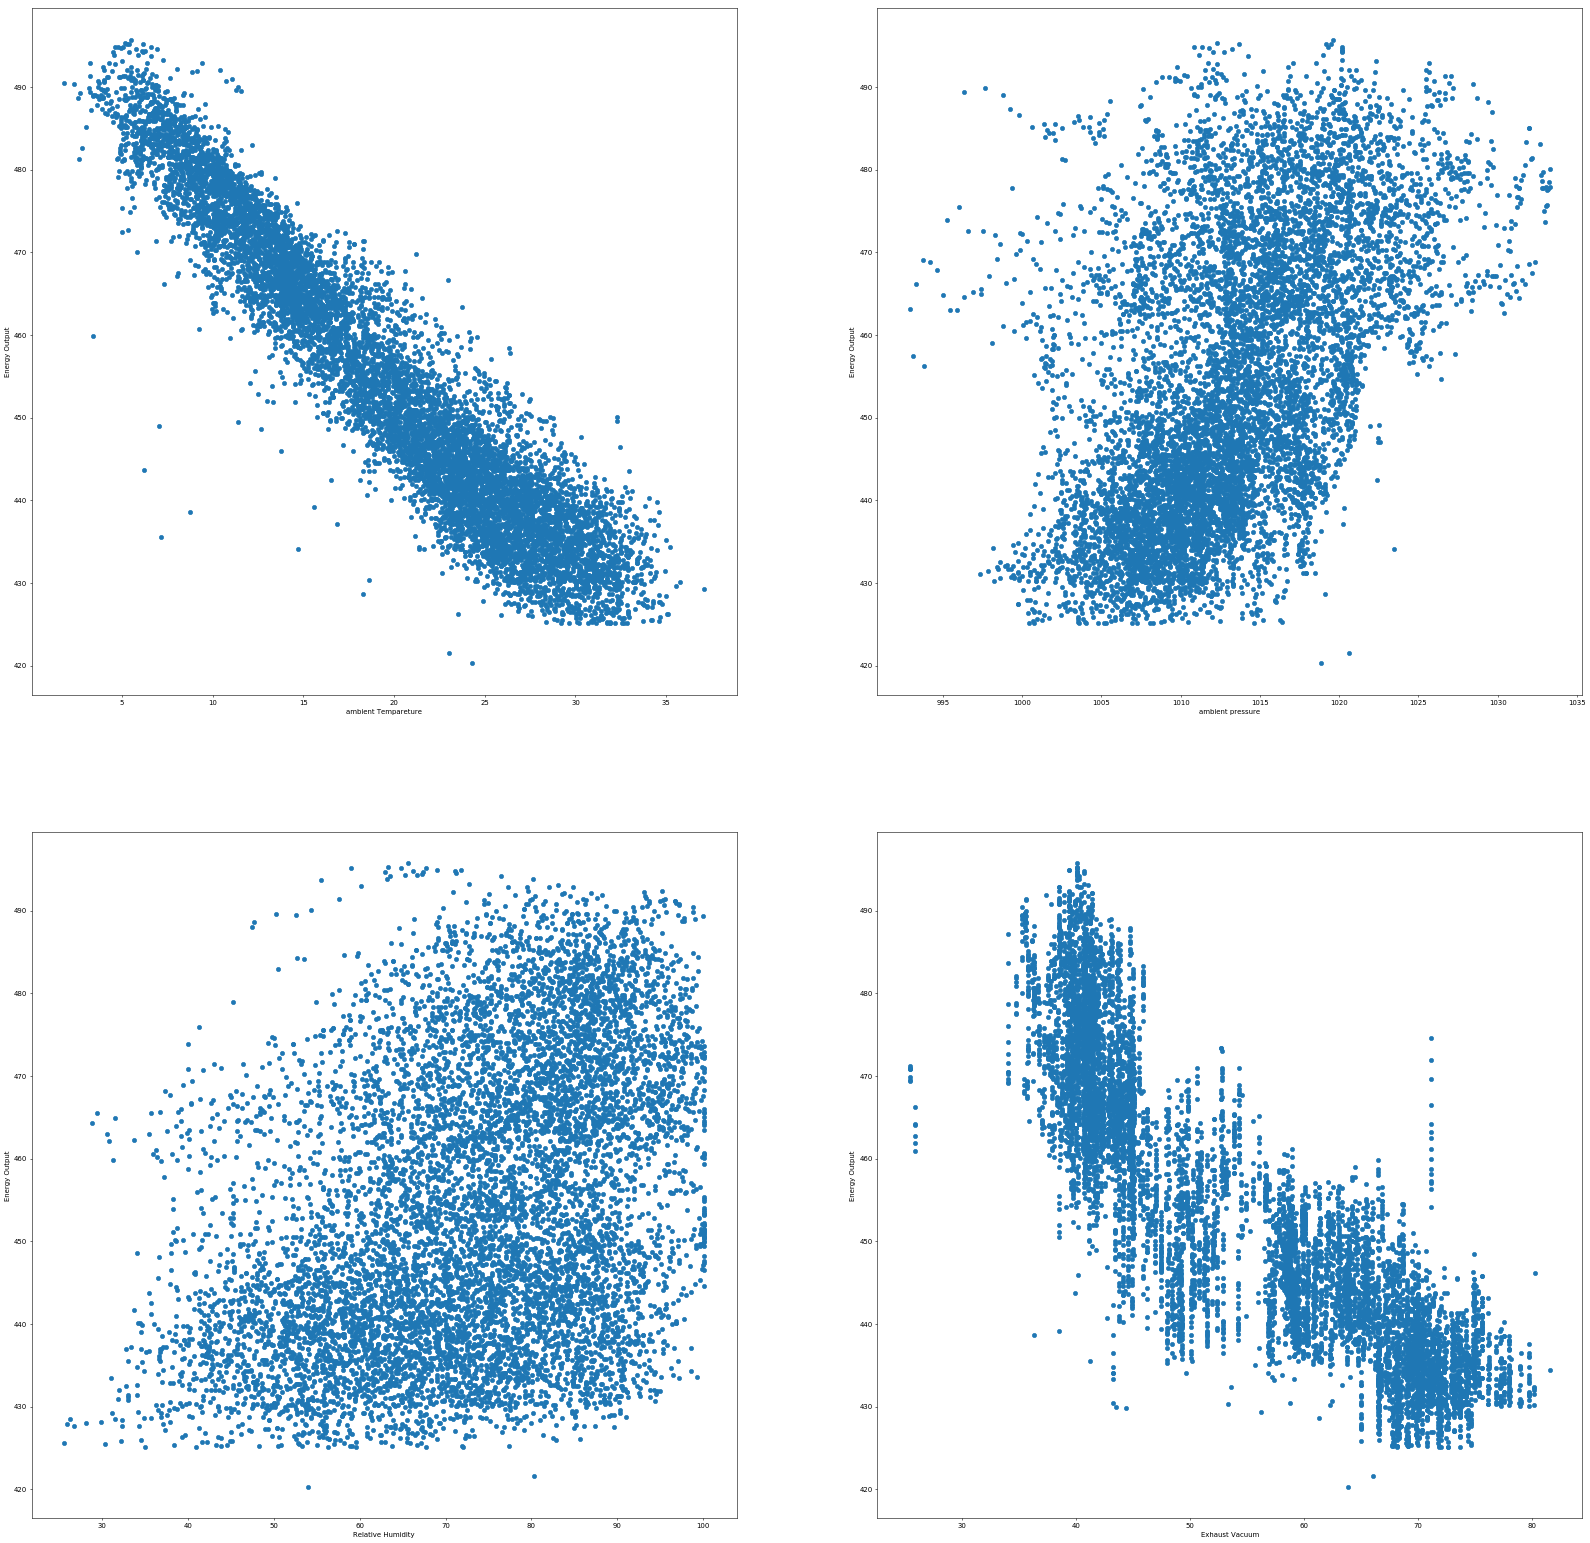

In [53]:
# plotting the scttered graph
my_dpi=50
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
plt.subplot(2,2,1)
plt.scatter(independent.AT,dependent.T)
plt.xlabel("ambient Tempareture")
plt.ylabel("Energy Output")
plt.subplot(2,2,2)
plt.scatter(independent.AP,dependent.T)
plt.xlabel("ambient pressure")
plt.ylabel("Energy Output")
plt.subplot(2,2,3)
plt.scatter(independent.RH,dependent.T)
plt.xlabel("Relative Humidity")
plt.ylabel("Energy Output")
plt.subplot(2,2,4)
plt.scatter(independent.V,dependent.T)
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Energy Output")

# Conclusion
<br>The scatter plots are showing the data points and their association.
<br>1) The first plot shows the scatter plot for ambient tempareture. The  ambient tempareture has almost linear association with the power and has the negitive slope. Approximately the number of outliers are less comparative to other independent features
<br>2) The second plot shows the scatter plot for ambient pressure. The ambient pressure does have a non-linear association and has many outliers.
<br>3) The third plot shows the scatter plot for Relative humididty. The relative humidity has non linear association and many outliers are present which can be removed.
<br>4) The fourth plot shows the scatter plot for Exhaust Vacuum. The graph has some linear association but not as linear as ambient tempareture. This also has some outliers which can be reomoved


# iii. What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [54]:
#ambient_temp = dataset.iloc[:,1:1]
a=[]
a.append(dataset.AT.quantile([0.25,0.5,0.75]))
a.append(dataset.V.quantile([0.25,0.5,0.75]))
a.append(dataset.AP.quantile([0.25,0.5,0.75]))
a.append(dataset.RH.quantile([0.25,0.5,0.75]))
a.append(dataset.PE.quantile([0.25,0.5,0.75]))


In [55]:
qr=[]
for p in a:
    c = 0
    qrange=[]
    for no1,no2 in p.items():
        c=c+1
        if c==1 or c==3:
            qrange.append(no2)
    
    print("Quratile Range",qrange[1]-qrange[0])
    qr.append(qrange[1]-qrange[0])

Quratile Range 12.209999999999999
Quratile Range 24.800000000000004
Quratile Range 8.159999999999968
Quratile Range 21.502499999999998
Quratile Range 28.680000000000007


In [56]:
basic_table = dataset.describe()
basic_table.loc["in-terquartile ranges"] = [qr[0],qr[1],qr[2],qr[3],qr[4]] 


In [57]:
AT_range = basic_table.AT["max"]-basic_table.AT["min"]
V_range = basic_table.V["max"]-basic_table.V["min"]
AP_range = basic_table.AP["max"]-basic_table.AP["min"]
RH_range = basic_table.RH["max"]-basic_table.RH["min"]
PE_range = basic_table.PE["max"]-basic_table.PE["min"]


In [58]:
basic_table.loc["Range"] = [AT_range,V_range,AP_range,RH_range,PE_range] 
basic_table

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
in-terquartile ranges,12.210000,24.800000,8.160000,21.502500,28.680000
Range,35.300000,56.200000,40.410000,74.600000,75.500000


# (C)For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to backup your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:25   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

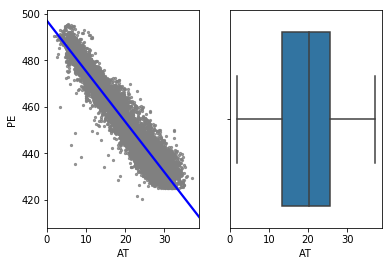

In [59]:
## linear regression  for AT


model_AT = sm1.ols(formula = 'PE ~ AT ', data=dataset)
results_AT = model_AT.fit()
print(results_AT.summary())

plt.subplot(1,2,1)
sns.regplot(x="AT", y="PE", data=dataset, color='b',scatter_kws={"color":"grey","s": 5},line_kws={'label':"y={0:.2f}x+{1:.2f}".format(results_AT.params.AT,results_AT.params.Intercept)})
plt.subplot(1,2,2)
sns.boxplot(dataset.AT)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:26   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

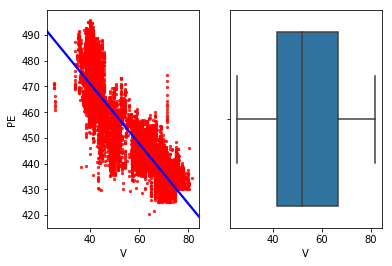

In [60]:
## linear regression  for V

model_V = sm1.ols(formula = 'PE ~ V ', data=dataset)
results_V = model_V.fit()
print(results_V.summary())
plt.subplot(1,2,1)
ax = sns.regplot(x="V", y="PE", data=dataset, color='b',scatter_kws={"color":"red","s": 5},line_kws={'label':"y={0:.2f}x+{1:.2f}".format(results_V.params.V,results_V.params.Intercept)})
plt.subplot(1,2,2)
sns.boxplot(dataset.V)




                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:27   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

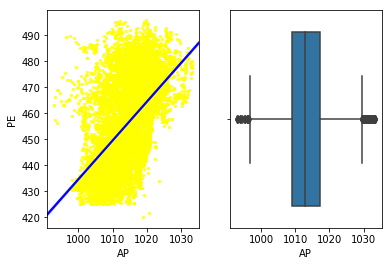

In [61]:
# linear regression  for AP


model_AP = sm1.ols(formula = 'PE ~ AP ', data=dataset)
results_AP = model_AP.fit()
print(results_AP.summary())
plt.subplot(1,2,1)
ax = sns.regplot(x="AP", y="PE", data=dataset, color='b',scatter_kws={"color":"yellow","s": 5},line_kws={'label':"y={0:.2f}x+{1:.2f}".format(results_AP.params.AP,results_AP.params.Intercept)})
plt.subplot(1,2,2)
sns.boxplot(dataset.AP)





                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:29   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

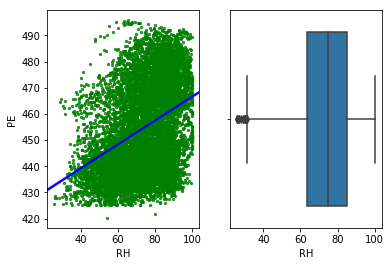

In [62]:
# linear regression  for RH


model_RH = sm1.ols(formula = 'PE ~ RH ', data=dataset)
results_RH = model_RH.fit()
print(results_RH.summary())
plt.subplot(1,2,1)
ax = sns.regplot(x="RH", y="PE", data=dataset, color='b',scatter_kws={"color":"green","s": 5},line_kws={'label':"y={0:.2f}x+{1:.2f}".format(results_RH.params.RH,results_RH.params.Intercept)})
plt.subplot(1,2,2)

sns.boxplot(dataset.RH)



# Conclusion
# The linear regression for 
1) AT : the p value is 0.000 hence AT has good significance. The Coeficient is -2.1713 so the slope is negitive.
<br> The Box plot shows that there are no potential outliers
<br>2) AP : the p value is 0.000 hence AP has good significance. The Coeficient is 1.4899 so the slope is negitive.
<br>The Box plot shows that there are no potential outliers
<br>3) V : the p value is 0.000 hence V has good significance. The Coeficient is  -1.1681 so the slope is negitive.
<br>The Box plot shows that there are potential outliers 
<br>4) RH : the p value is 0.000 hence RH has good significance. The Coeficient is 0.4557 so the slope is negitive.
<br>The Box plot shows that there are potential outliers

# (d)Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis
<br>$$H_{0} : \beta _{0} \neq 0$$

In [63]:
# multiple linear regression


model = sm.OLS(dependent,independent)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.939e+07
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:30   Log-Likelihood:                -29068.
No. Observations:                9568   AIC:                         5.814e+04
Df Residuals:                    9564   BIC:                         5.817e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6781      0.015   -109.169      0.0

# Conclusion
# Here we can see that all the features are having significance for the dependent variable PE as the P value for all the features is less than 0.05. 
# So the Beta values for each of the predictors is large enough and hence we can reject the null hypothesis for all the features.

# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeficients from 1c on the x-axis, and the multiple regression coecfients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeficient in a simple linear regression model is shown on the x-axis, and its coeficient estimate in the multiple linear regression model is shown on the y-axis.

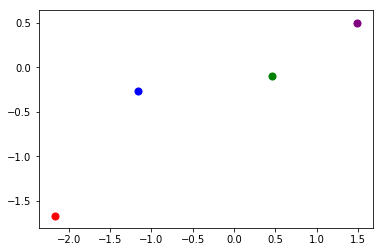

In [64]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(results_AT.params.AT, results.params.AT, s=50 , color='red')
plt.scatter(results_V.params.V, results.params.V, s=50 , color='blue')
plt.scatter(results_AP.params.AP, results.params.AP, s=50 , color='purple')
plt.scatter(results_RH.params.RH, results.params.RH, s=50 , color='green')


#  (F)Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the  form
$$\boldsymbol{y = \beta _{0}+\beta _{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}}$$

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:31   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

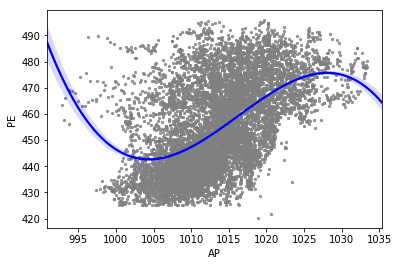

In [65]:
# Polynomial regression AP
model_pol_AP = sm1.ols(formula = 'PE ~ AP + I(AP**2) + I(AP**3)', data=dataset)
results_pol_AP = model_pol_AP.fit()
print(results_pol_AP.summary())
ax = sns.regplot(x="AP", y="PE", data=dataset, color='b',scatter_kws={"color":"grey","s": 5} ,order=3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:34   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

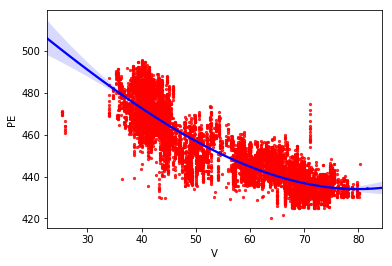

In [66]:
# Polynomial regression V
model_pol_V = sm1.ols(formula = 'PE ~ V + I(V**2) + I(V**3)', data=dataset)
results_pol_V = model_pol_V.fit()
print(results_pol_V.summary())
ax = sns.regplot(x="V", y="PE", data=dataset, color='b',scatter_kws={"color":"red","s": 5} ,order=3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:36   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

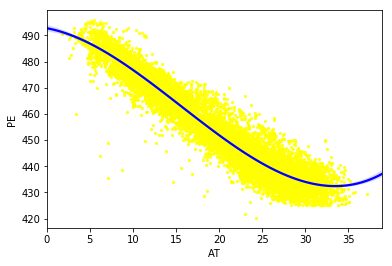

In [67]:
# Polynomial regression AT
model_pol_AT = sm1.ols(formula = 'PE ~ AT + I(AT**2) + I(AT**3)', data=dataset)
results_pol_AT = model_pol_AT.fit()
print(results_pol_AT.summary())
ax = sns.regplot(x="AT", y="PE", data=dataset, color='b',scatter_kws={"color":"yellow","s": 5} ,order=3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:39   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

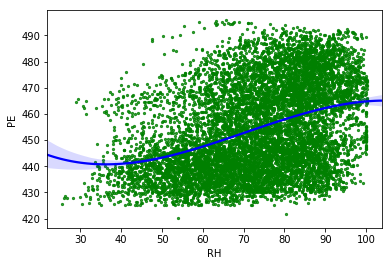

In [68]:
# Polynomial regression RH
model_pol_RH = sm1.ols(formula = 'PE ~ RH + I(RH**2) + I(RH**3)', data=dataset)
results_pol_RH = model_pol_RH.fit()
print(results_pol_RH.summary())
ax = sns.regplot(x="RH", y="PE", data=dataset, color='b',scatter_kws={"color":"green","s": 5} ,order=3)

# Conclusion
# Yes few features have have non-linear relation with i.e. AP,AT,RH have non linear relation as the P- values for each polynomial term is less than 0.05 But for $$c=V^{2}$$ value has the P - value greater than 0.05 hence it has a very weak significance and can be dropped off. 


# (g)Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [69]:
# Pairwise interaction
model_pol_AT_V_pair = sm1.ols(formula = 'PE ~ AP+V+RH+AT+I(AT*V)+I(AT*AP)+I(V*AP)+I(AT*RH)+I(V*RH)+I(RH*AP)', data=dataset)
results_pol_AT_V_pair = model_pol_AT_V_pair.fit()

print("For AT and V")
print(results_pol_AT_V_pair.summary())

For AT and V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:42   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8

# Conclusion
# For the above pair wise interactoion we can see that we pairs have significant contribution to the change of the dependent variables.
# Those pairs which do not have significance are 
# <br>1) AT and AP
# <br>2) V and RH
# <br>Rest all other pairs have significant interaction


# (H)Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.¶

In [70]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=42)
Df_train = X_train.join(y_train)
train_DF = pd.DataFrame(Df_train)
model_h_train = sm1.ols(formula = 'PE ~ AT + V + AP + RH', data=train_DF)

results_h_train_split = model_h_train.fit()
pred_h_train_split = results_h_train_split.predict(X_test)
mean_square_error_train_split = results_h_train_split.mse_resid
mean_square_error_test_split= mean_squared_error(y_test, pred_h_train_split)
print("Train Error with all predictors",mean_square_error_train_split)
print("Test Error with all predictors ",mean_square_error_test_split)

# Using the backward selection algorithm 

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=42)
Df_train = X_train.join(y_train)
train_DF = pd.DataFrame(Df_train)
model_h_train = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(AT*AP)+I(V*AP)+I(V*RH)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)+I(V**2)', data=train_DF)
results_h_train= model_h_train.fit()

#From the above model the V*RH feature has the max P value so its eliminated in the next model

model_h_train = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(AT*AP)+I(V*AP)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)+I(V**2)', data=train_DF)
results_h_train= model_h_train.fit()
#From the above model the V^2 feature has the max P value so its eliminated in the next model

model_h_train = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(AT*AP)+I(V*AP)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)', data=train_DF)
results_h_train= model_h_train.fit()

#From the above model the AT*AP feature has the max P value so its eliminated in the next model


model_h_train = sm1.ols(formula = 'PE ~ AT +V +AP + RH + I(AT**2)+I(AP**2)+I(RH**2)+I(AT*RH)+I(AT*V)+I(V*AP)+I(RH*AP)', data=train_DF)
results_h_train= model_h_train.fit()
print(results_h_train.summary())
#Above model has all the features having P value less than 0.05
print("\n\n\n")
print("Above model has all the features having P value less than 0.05")
pred_h_train = results_h_train.predict(X_test)
mean_square_error_train = results_h_train.mse_resid
mean_square_error_test = mean_squared_error(pred_h_train,y_test)
print("\n\n\n\n")
print("Train Error with all Significant predictors",mean_square_error_train)
print("Test Error with all Significant predictor",mean_square_error_test)

Train Error with all predictors 20.596216922186493
Test Error with all predictors  21.23985693822556
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9256.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:53:42   Log-Likelihood:                -19161.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6685   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# Conclusion
# Here we can see that the insignificant bits are removed and only the significant features are retained. 
# Following are the features that are retained.
$$AT$$
$$V$$ 
$$AP$$
$$RH$$
$$AT^{2}$$
$$AP^{2}$$
$$RH^{2}$$
$$AT*RH$$
$$AT*V$$
$$RH*AP$$
$$AT*AP$$

# (i) KNN Regression:
# Perform k-nearest neighbor regression for this dataset using both normalized
# and raw features. Find the value of $$k \epsilon\begin{Bmatrix}
1 ,& 2 ,& .... &,100 
\end{Bmatrix}$$
# that gives you the best fit. Plot the train and test errors in terms of 1=k.

Value of K for minimum error of unnormalized data is : 5
Mean squared error for test data : 15.810754571577844


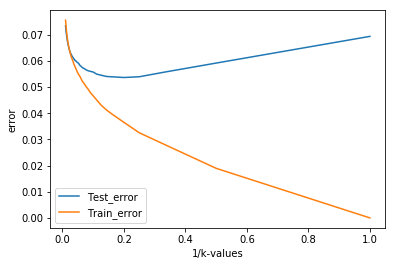

In [71]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=42)
test_error={}
train_error={}

K = range(1,101)
for i in K:
    pred = KNeighborsRegressor(n_neighbors=i)
    pred.fit(X_train, y_train)

    train_error[i]=1-(pred.score(X_train, y_train))
    test_error[i]=1-(pred.score(X_test,y_test))
    
part_k_min=min(test_error,key=test_error.get)
error_rate_sorted  = sorted(test_error.items())
x4,y4 = zip(*error_rate_sorted)
error_rate_sorted  = sorted(train_error.items())
x4,y4_train = zip(*error_rate_sorted)
x4 = [1/X for X in x4 ]  
plt.xlabel("1/k-values")
plt.ylabel("error")
a = plt.plot(x4,y4,label = "Test_error")
b = plt.plot(x4,y4_train, label="Train_error")
plt.legend()
print("Value of K for minimum error of unnormalized data is : "+str(part_k_min))
# for K=5 we are getting the lowest error
pred = KNeighborsRegressor(n_neighbors=4)
pred.fit(X_train, y_train)
y_prediction = pred.predict(X_test)
print("Mean squared error for test data : " + str(mean_squared_error(y_test,y_prediction)))

Value of K for minimum error of normalized data is : 4
Mean squared error for test data : 0.002517197223700568


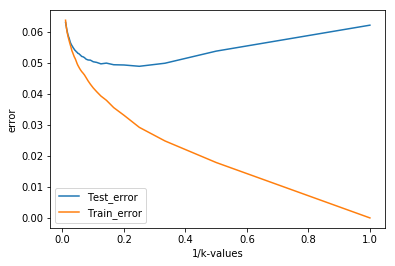

In [72]:
# Normalized Data
from sklearn import preprocessing

scaling =   preprocessing.MinMaxScaler()

independent_nor = pd.DataFrame(scaling.fit_transform(independent))
dependent_nor = pd.DataFrame(scaling.fit_transform(dependent))


X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(independent_nor, dependent_nor, test_size=0.30, random_state=42)

test_error_nor={}
train_error_nor={}
part_k_min_nor={}
K = range(1,101)
for i in K:
    pred = KNeighborsRegressor(n_neighbors=i)
    pred.fit(X_train_nor, y_train_nor)

    train_error_nor[i]=1-(pred.score(X_train_nor, y_train_nor))
    test_error_nor[i]=1-(pred.score(X_test_nor,y_test_nor))
    
part_k_min_nor=min(test_error_nor,key=test_error_nor.get)
error_rate_sorted_nor  = sorted(test_error_nor.items())
x4_nor,y4_nor = zip(*error_rate_sorted_nor)
error_rate_sorted_nor  = sorted(train_error_nor.items())
x4_nor,y4_train_nor = zip(*error_rate_sorted_nor) 
x4_nor = [1/X for X in x4_nor ]
plt.xlabel("1/k-values")
plt.ylabel("error")
a = plt.plot(x4_nor,y4_nor,label = "Test_error")
b = plt.plot(x4_nor,y4_train_nor, label="Train_error")
plt.legend()
print("Value of K for minimum error of normalized data is : "+str(part_k_min_nor))
# for K=4 we are getting the lowest error 
pred = KNeighborsRegressor(n_neighbors=4)
pred.fit(X_train_nor, y_train_nor)
y_prediction_nor = pred.predict(X_test_nor)
print("Mean squared error for test data : " + str(mean_squared_error(y_test_nor,y_prediction_nor)))

# Conclusion
# (j)Compare the results of KNN Regression with linear regression and provide your analysis.

### Train and test errors for linear regression with all predictors

Train Error with all predictors 20.596216922186493
Test Error with all predictors  21.23985693822556

### Train and test errors for linear regression with all significant predictors(interactions and quadratic nonlinearities)

Train Error with all Significant predictors 17.92541228952912
Test Error with all Significant predictor 18.652607819673683

### KNN- Regression without normalization

Value of K for minimum error of unnormalized data is : 5
Mean squared error for test data : 15.810754571577844

### KNN-Regression with Normalization

Value of K for minimum error of normalized data is : 4
Mean squared error for test data : 0.002517197223700568

## From the above observation we can see that KNN regression performs the best for the abocve example